[View in Colaboratory](https://colab.research.google.com/github/saitejdandge/21-Machine-Learning-Weeks/blob/master/Keras-Demo/convolution_neural_network.ipynb)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
58496/60000 [============================>.] - ETA: 2s - loss: 0.1539 - acc: 0.9532

60000/60000 [==============================] - 86s 1ms/step - loss: 0.1513 - acc: 0.9540 - val_loss: 0.0412 - val_acc: 0.9863
Epoch 2/10
57216/60000 [===========================>..] - ETA: 3s - loss: 0.0411 - acc: 0.9874

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0413 - acc: 0.9873 - val_loss: 0.0480 - val_acc: 0.9850
Epoch 3/10
56704/60000 [===========================>..] - ETA: 4s - loss: 0.0274 - acc: 0.9918

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0279 - acc: 0.9917 - val_loss: 0.0329 - val_acc: 0.9890
Epoch 4/10
56448/60000 [===========================>..] - ETA: 4s - loss: 0.0185 - acc: 0.9940

60000/60000 [==============================] - 84s 1ms/step - loss: 0.0182 - acc: 0.9941 - val_loss: 0.0263 - val_acc: 0.9930
Epoch 5/10
56320/60000 [===========================>..] - ETA: 4s - loss: 0.0144 - acc: 0.9954

60000/60000 [==============================] - 84s 1ms/step - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0275 - val_acc: 0.9919
Epoch 6/10
56320/60000 [===========================>..] - ETA: 4s - loss: 0.0124 - acc: 0.9961

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0124 - acc: 0.9960 - val_loss: 0.0274 - val_acc: 0.9919
Epoch 7/10
56320/60000 [===========================>..] - ETA: 4s - loss: 0.0096 - acc: 0.9971

60000/60000 [==============================] - 85s 1ms/step - loss: 0.0097 - acc: 0.9970 - val_loss: 0.0269 - val_acc: 0.9925
Epoch 8/10
56320/60000 [===========================>..] - ETA: 4s - loss: 0.0092 - acc: 0.9969

60000/60000 [==============================] - 83s 1ms/step - loss: 0.0093 - acc: 0.9968 - val_loss: 0.0325 - val_acc: 0.9922
Epoch 9/10
56320/60000 [===========================>..] - ETA: 4s - loss: 0.0067 - acc: 0.9980

60000/60000 [==============================] - 83s 1ms/step - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0316 - val_acc: 0.9917
Epoch 10/10
56064/60000 [===========================>..] - ETA: 5s - loss: 0.0064 - acc: 0.9981

60000/60000 [==============================] - 84s 1ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0331 - val_acc: 0.9924
Test loss: 0.03314812394968931
Test accuracy: 0.9924


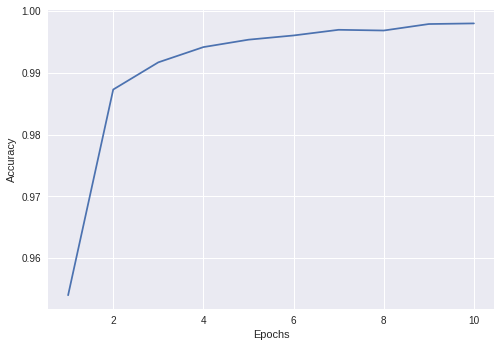

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_x, img_y = 28, 28

# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()